In [1]:
import matrix_utils as mu
import plotting_utils as pu
import matplotlib.pyplot as plt
import numpy as np

In [12]:
%config InlineBackend.figure_format = 'retina'

In [2]:
a_folder = "/home/sina/projects/bus/validate/all_bus_umi_test/kallisto_SRR6998058_v2"
b_folder = "/home/single_cell_analysis/cellranger_out/cellranger3_SRR6998058_v2_out/outs/raw_feature_bc_matrix/"
c_folder = "/home/single_cell_analysis/cellranger_out/cellranger3_SRR6998058_v2_out/outs/filtered_feature_bc_matrix/"

In [3]:
A = mu.import_adata(a_folder)
B = mu.import_adata(b_folder, cr=True)
C = mu.import_adata(c_folder, cr=True)

A = mu.basic_process(A)
B = mu.basic_process(B)
C = mu.basic_process(C)

AnnData object with n_obs × n_vars = 31053 × 116760 
AnnData object with n_obs × n_vars = 31053 × 737280 
    obs: 'name', 'feature'
AnnData object with n_obs × n_vars = 31053 × 575 
    obs: 'name', 'feature'
AnnData object with n_obs × n_vars = 31053 × 110568 
    var: 'counts', 'ngenes'
    layers: 'log1p'
AnnData object with n_obs × n_vars = 31053 × 108358 
    obs: 'name', 'feature'
    var: 'counts', 'ngenes'
    layers: 'log1p'
AnnData object with n_obs × n_vars = 31053 × 575 
    obs: 'name', 'feature'
    var: 'counts', 'ngenes'
    layers: 'log1p'


In [5]:
joint, common, A_var, B_var = mu.barcode_sets(A, B)

In [6]:
print('Total barcodes seen: {:,}'.format(len(joint)))
print('Barcodes seen by A & B: {:,}'.format(len(common)))
print('Seen by A missed by B: {:,}'.format(len(joint) - len(A_var)))
print('Seen by B missed by A: {:,}'.format(len(joint) - len(B_var)))

Total barcodes seen: 104,164
Barcodes seen by A & B: 104,164
Seen by A missed by B: 0
Seen by B missed by A: 0


In [ ]:
A, B = mu.filter_adata(A, B, obs=True, var=True)
Af, C = mu.filter_adata(A, C, by_C=True)
Bf, C = mu.filter_adata(B, C, by_C=True)

In [4]:
print("[A] {}".format(A.shape))
print("[B] {}".format(B.shape))
print("[C] {}".format(C.shape))
print("[Af] {}".format(Af.shape))
print("[Bf] {}".format(Bf.shape))

[A] (31053, 104164)
[B] (31053, 104164)
[C] (31053, 575)
[Af] (31053, 575)
[Bf] (31053, 575)


In [7]:
A_AB, M_AB = mu.MA(Af, Bf)

In [8]:
cc_raw = mu.T_sparse_M_corr(A[:,common.index].layers['log1p'].T, B[:,common.index].layers['log1p'].T)
cc_filtered = mu.T_sparse_M_corr(Af.layers['log1p'].T, Bf.layers['log1p'].T)

In [9]:
Af = mu.compute_tsvd(Af)
Bf = mu.compute_tsvd(Bf)

In [10]:
Af = mu.compute_tsne(Af)
Bf = mu.compute_tsne(Bf)

In [11]:
dist_AA, dist_AB = mu.l1_dist(Af.layers['log1p'].T, Bf.layers['log1p'].T)

In [31]:
import imp
imp.reload(pu)

<module 'plotting_utils' from '/home/sina/projects/bus/velocity/data/human_embryo_forebrain/plotting_utils.py'>

## Plotting

In [13]:
fsize= 15
A_color = '#FF7F0E'
B_color = '#1F77B4'
dotsize = 10
xmax = 1e5
gridalpha = 0.2

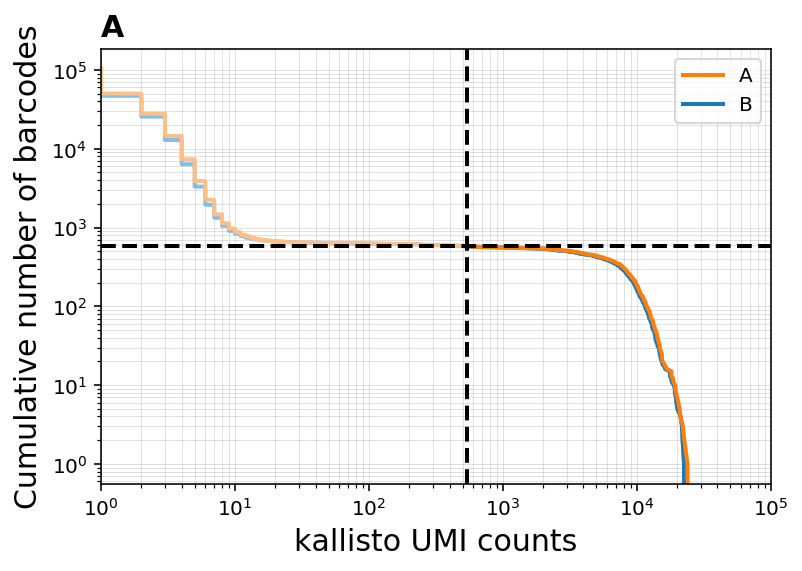

In [14]:
fig, ax = plt.subplots()
pu.knee_plot(B, ax, light=True, color=B_color, linewidth=2, alpha=1)
pu.knee_plot(A, ax, light=True, color=A_color, linewidth=2, alpha=1)
pu.knee_plot(Bf, ax, color=B_color, linewidth=2, alpha=1, label="B")
pu.knee_plot(Af, ax, color=A_color, linewidth=2, alpha=1, label="A")
pu.knee_plot_settings(Af, ax=ax)
plt.show()

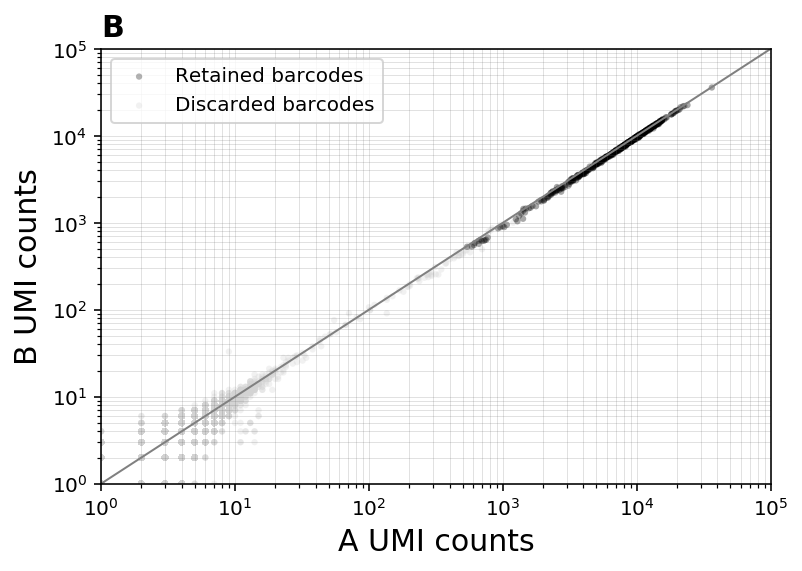

In [15]:
fig, ax = plt.subplots()

pu.barcode_ratio_plot(Af, Bf, joint, ax=ax)
pu.barcode_ratio_plot_settings(ax)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


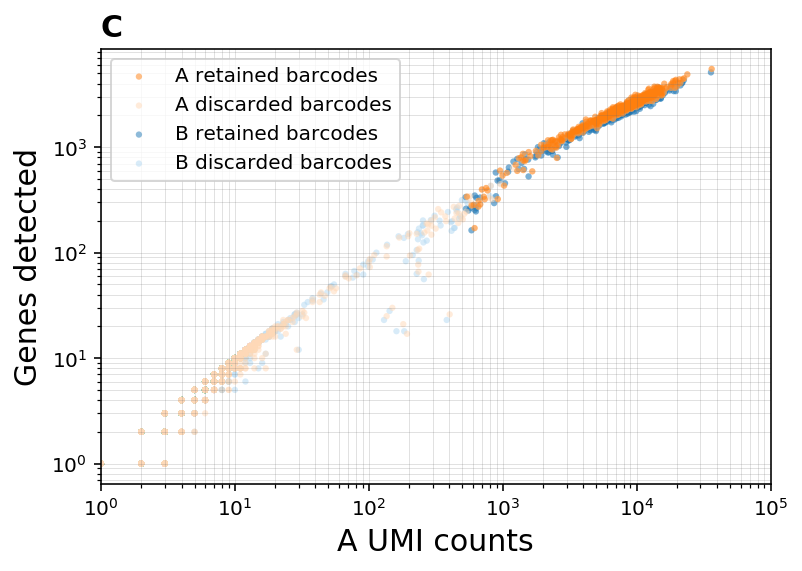

In [16]:
fig, ax = plt.subplots()

pu.genes_detected_plot(B_var,ax=ax,light=True,s=dotsize,alpha=0.5,c=B_color,edgecolors='none',label='B discarded barcodes')
pu.genes_detected_plot(Bf.var,ax=ax,light=False,s=dotsize,alpha=0.5,c=B_color,edgecolors='none',label='B retained barcodes')

pu.genes_detected_plot(A_var,ax=ax,light=True,s=dotsize,alpha=0.5,c=A_color,edgecolors='none',label='A discarded barcodes')
pu.genes_detected_plot(Af.var,ax=ax,light=False,s=dotsize,alpha=0.5,c=A_color,edgecolors='none',label='A retained barcodes')

pu.genes_detected_plot_settings(ax)
plt.show()

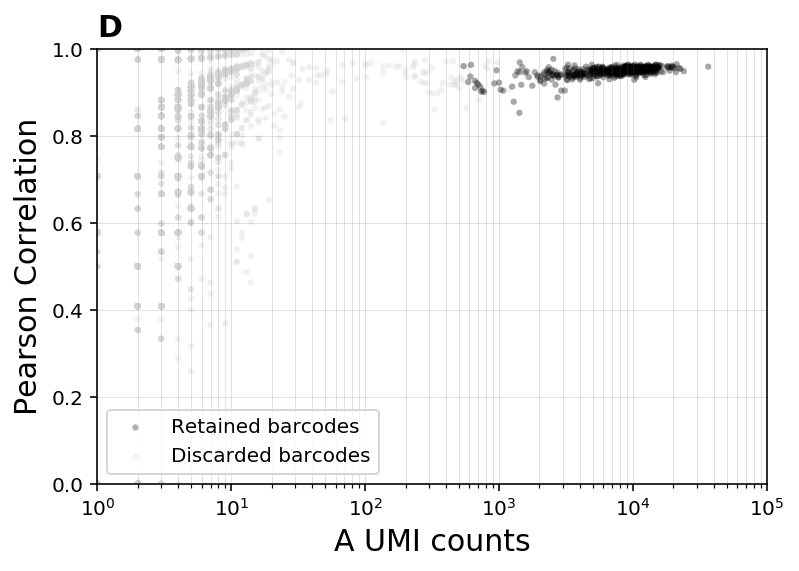

In [17]:
fig, ax = plt.subplots()

pu.cc_raw_plot(common,cc_raw,ax=ax,s=dotsize,c='lightgray',alpha=0.3,edgecolors='none',label='Discarded barcodes')
pu.cc_filtered_plot(Af,cc_filtered,ax=ax,s=dotsize,c='black',alpha=0.3,edgecolors='none',label='Retained barcodes')
pu.cc_plot_settings(ax)
plt.show()

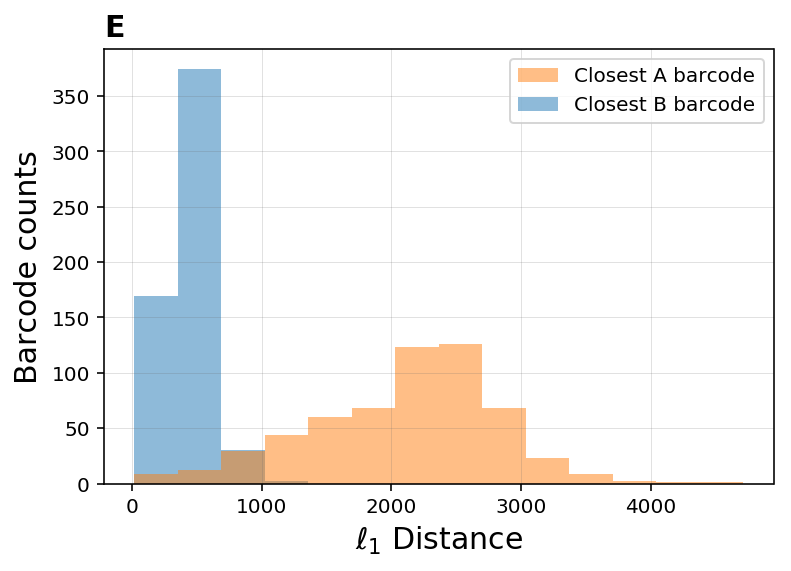

In [18]:
fig, ax = plt.subplots()

pu.l1_plot(dist_AA, dist_AB, ax)
pu.l1_plot_settings(ax)

plt.show()

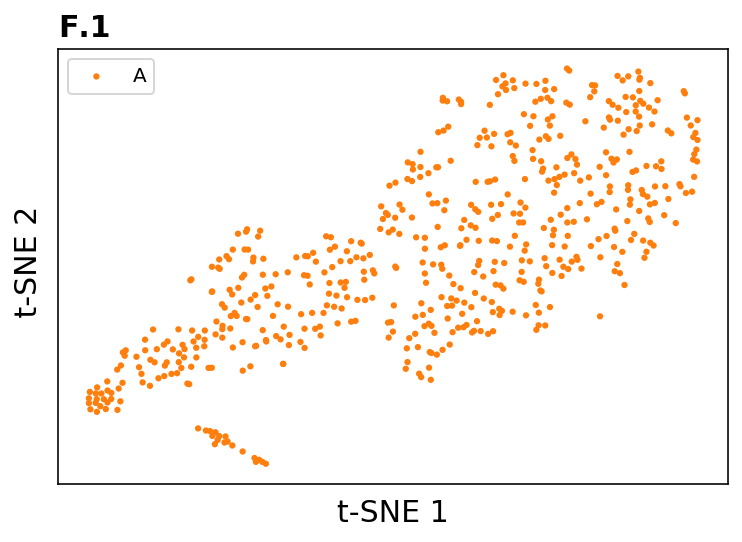

In [27]:
fig, ax = plt.subplots()

pu.tsne_plot(Af, ax, s =10, c = A_color, alpha = 1, edgecolors = 'none', label = 'A' )
pu.tsne_plot_settings("F.1", ax)
plt.show()

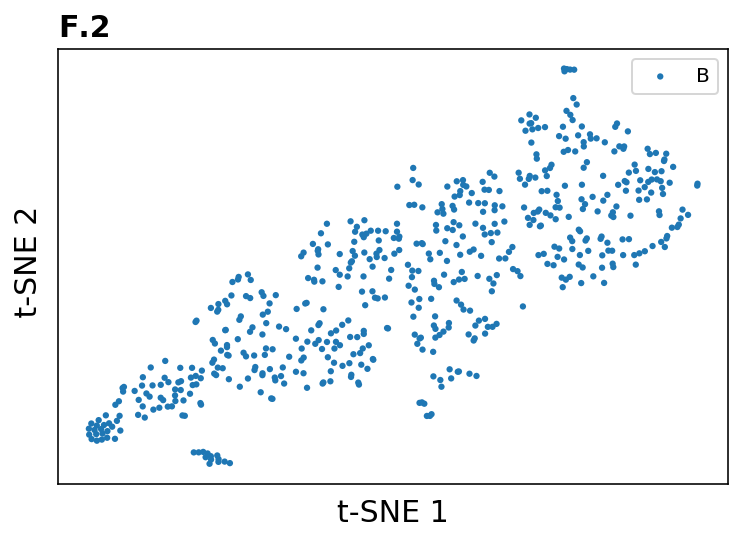

In [29]:
fig, ax = plt.subplots()

pu.tsne_plot(Bf, ax, s =10, c = B_color, alpha = 1, edgecolors = 'none', label = 'B' )
pu.tsne_plot_settings("F.2", ax)
plt.show()

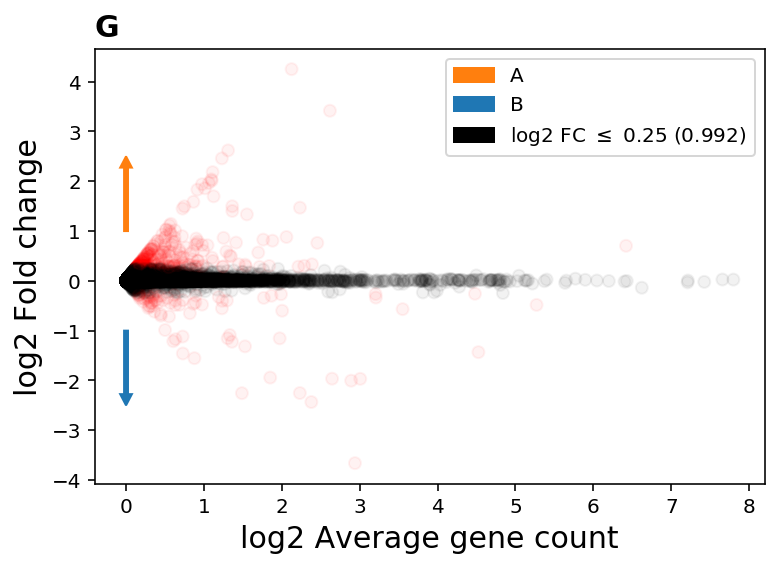

In [32]:
fig, ax = plt.subplots()

pu.MA_plot(A_AB, M_AB, ax=ax)
pu.MA_plot_settings(M_AB, ax)
plt.show()

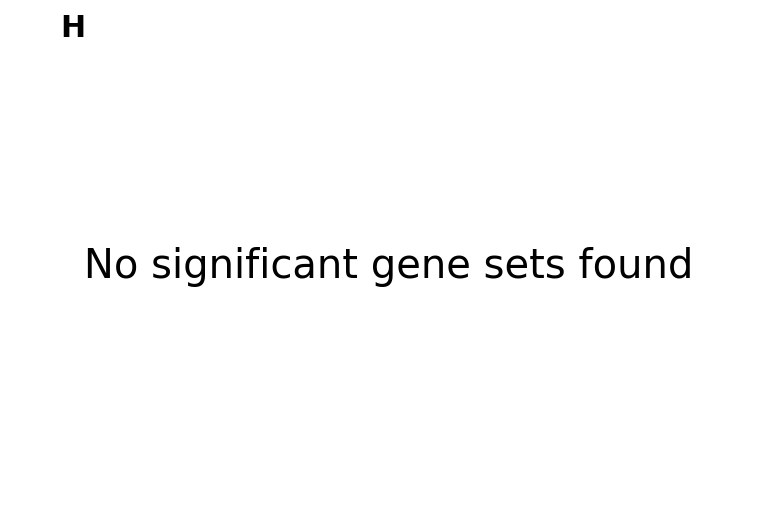

In [22]:
fig, ax = plt.subplots()

pu.DE_plot('/home/single_cell_analysis/brain_storm/gsea_bar/', 'SRR6998058_v2', ax=ax)
plt.show()

# Plot of Everything

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


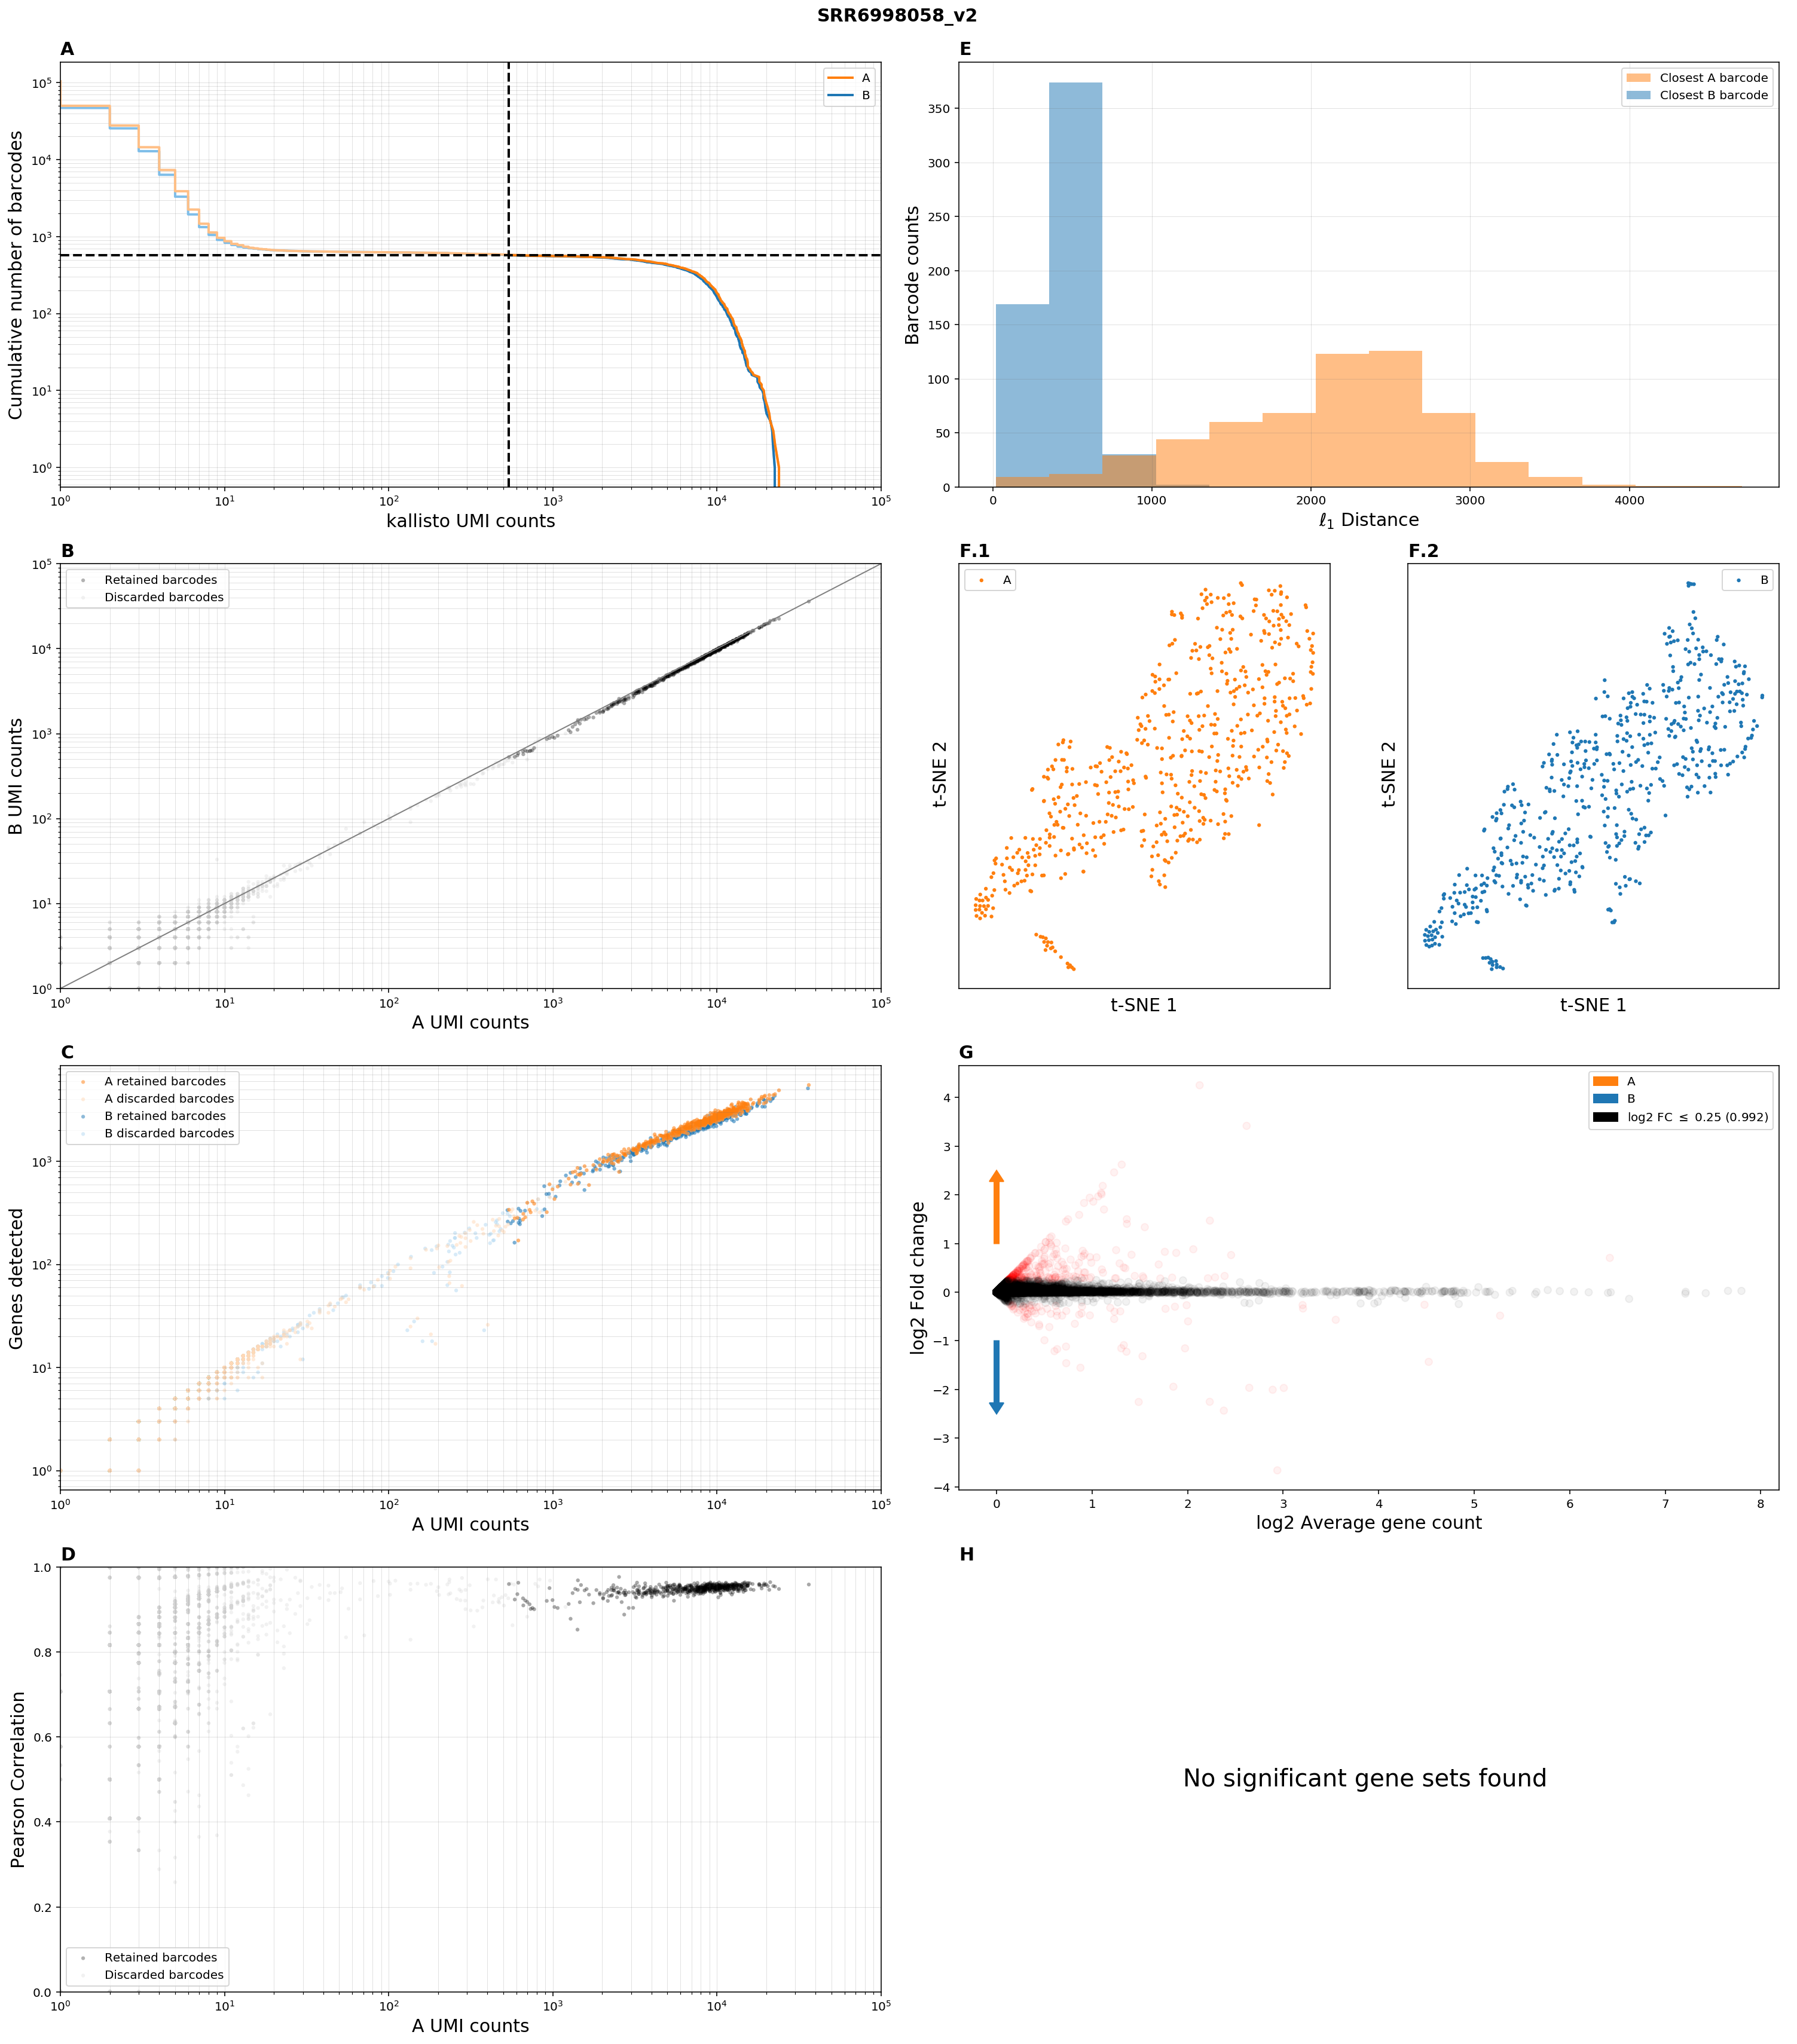

-----------PLOT SAVED!---------


In [33]:
# define some values we use to keep the plots consistent
fsize= 15
A_color = '#FF7F0E'
B_color = '#1F77B4'
dotsize = 10
xmax = 1e5
gridalpha = 0.2
dataset_shortname = 'SRR6998058_v2'

# Make the figure with a 4x4 grid
# This is necessary so panel G can have left and right sides
fig = plt.figure(figsize=(21,25))
st = fig.suptitle(dataset_shortname, fontweight='bold', fontsize = fsize)
ax_a = plt.subplot2grid((4, 4), (0, 0), colspan=2)
ax_b = plt.subplot2grid((4, 4), (1, 0), colspan=2)
ax_c = plt.subplot2grid((4, 4), (2, 0), colspan=2)
ax_d = plt.subplot2grid((4, 4), (3, 0), colspan=2)
ax_e = plt.subplot2grid((4, 4), (0, 2), colspan=2)
ax_f_left = plt.subplot2grid((4, 4), (1, 2), colspan=1)
ax_f_right = plt.subplot2grid((4, 4), (1, 3), colspan=1)
ax_g = plt.subplot2grid((4, 4), (2, 2), colspan=2)
ax_h = plt.subplot2grid((4, 4), (3, 2), colspan=2)

## Now we make the plots
# A ###  KNEE PLOT ##########
loc = ax_a
pu.knee_plot(B, ax=loc, light=True, color=B_color, linewidth=2, alpha=1)
pu.knee_plot(A, ax=loc, light=True, color=A_color, linewidth=2, alpha=1)
pu.knee_plot(Bf, ax=loc, color=B_color, linewidth=2, alpha=1, label="B")
pu.knee_plot(Af, ax=loc, color=A_color, linewidth=2, alpha=1, label="A")
pu.knee_plot_settings(Af, ax=loc)

# B ###  BARCODE RATIOS PLOT ##########
loc = ax_b
pu.barcode_ratio_plot(Af, Bf, joint, ax=loc)
pu.barcode_ratio_plot_settings(ax=loc)

# C ### GENE VS UMI PLOT ####
loc = ax_c
pu.genes_detected_plot(B_var,ax=loc,light=True,s=dotsize,alpha=0.5,c=B_color,edgecolors='none',label='B discarded barcodes')
pu.genes_detected_plot(Bf.var,ax=loc,light=False,s=dotsize,alpha=0.5,c=B_color,edgecolors='none',label='B retained barcodes')
pu.genes_detected_plot(A_var,ax=loc,light=True,s=dotsize,alpha=0.5,c=A_color,edgecolors='none',label='A discarded barcodes')
pu.genes_detected_plot(Af.var,ax=loc,light=False,s=dotsize,alpha=0.5,c=A_color,edgecolors='none',label='A retained barcodes')
pu.genes_detected_plot_settings(ax=loc)

# D ### CORRELATION PLOT ####
loc = ax_d
pu.cc_raw_plot(common,cc_raw,ax=loc,s=dotsize,c='lightgray',alpha=0.3,edgecolors='none',label='Discarded barcodes')
pu.cc_filtered_plot(Af,cc_filtered,ax=loc,s=dotsize,c='black',alpha=0.3,edgecolors='none',label='Retained barcodes')
pu.cc_plot_settings(ax=loc)

# E ### BARCODE DISTANCE PLOT ####
loc = ax_e
pu.l1_plot(dist_AA, dist_AB, ax=loc)
pu.l1_plot_settings(ax=loc)

# F ###  A t-SNE ##########
loc = ax_f_left
pu.tsne_plot(Af, ax=loc, s =10, c = A_color, alpha = 1, edgecolors = 'none', label = 'A' )
pu.tsne_plot_settings("F.1", ax=loc)

# F ### CellRanger t-SNE #############
loc = ax_f_right
pu.tsne_plot(Bf, ax=loc, s =10, c = B_color, alpha = 1, edgecolors = 'none', label = 'B' )
pu.tsne_plot_settings("F.2", ax=loc)

# G ### MA Plot #################
loc = ax_g
pu.MA_plot(A_AB, M_AB, ax=loc)
pu.MA_plot_settings(M_AB, ax=loc)

# H ##### DE PLOT #########
loc = ax_h
pu.DE_plot('/home/single_cell_analysis/brain_storm/gsea_bar/', dataset_shortname, ax=loc)


# plt.savefig(str('./delete/' + dataset_shortname + '.png'), dpi=300, bbox_inches='tight')
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.925)
plt.show()
print('-----------PLOT SAVED!---------')